In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [143]:
df=pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Preprocessing Data Part 1

In [144]:
df.select_dtypes(include='object').nunique()

,0
experience_level,4
employment_type,4
job_title,93
salary_currency,20
employee_residence,78
company_location,72
company_size,3


In [145]:
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [146]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [147]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [148]:
def segment_job_title(job_title):
    # Dictionary untuk kategori job title berdasarkan kata kunci
    job_title_keywords = {
        'Data Scientist': ['Data Scientist', 'Applied Scientist', 'Lead Data Scientist', 'Product Data Scientist'],
        'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Engineer', 'Machine Learning Researcher', 'MLOps Engineer', 'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Scientist', 'Machine Learning Developer'],
        'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'BI Data Engineer', 'Azure Data Engineer', 'Software Data Engineer', 'Cloud Data Engineer', 'Data Infrastructure Engineer', 'Data Operations Engineer'],
        'AI Engineer': ['AI Developer', 'AI Scientist', 'AI Programmer', 'Deep Learning Engineer', 'NLP Engineer'],
        'Business Intelligence': ['BI Developer', 'BI Analyst', 'Business Intelligence Engineer', 'BI Data Analyst'],
        'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Financial Data Analyst', 'Compliance Data Analyst', 'Marketing Data Analyst'],
        'Data Architect': ['Data Architect', 'Principal Data Architect', 'Cloud Data Architect', 'Big Data Architect'],
        'Data Science Manager': ['Head of Data', 'Data Science Manager', 'Head of Data Science', 'Director of Data Science'],
        'Other': ['Research Engineer', 'Data Strategist', 'Data Modeler', 'ETL Engineer', 'Data Operations Analyst']
    }

    for key,value in job_title_keywords.items():
      if any(job in job_title for job in value):
        return key


In [149]:
df['segment_job_title']=df['job_title'].apply(segment_job_title)
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,segment_job_title
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Scientist
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Data Scientist
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Data Analyst
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L,Data Science Manager


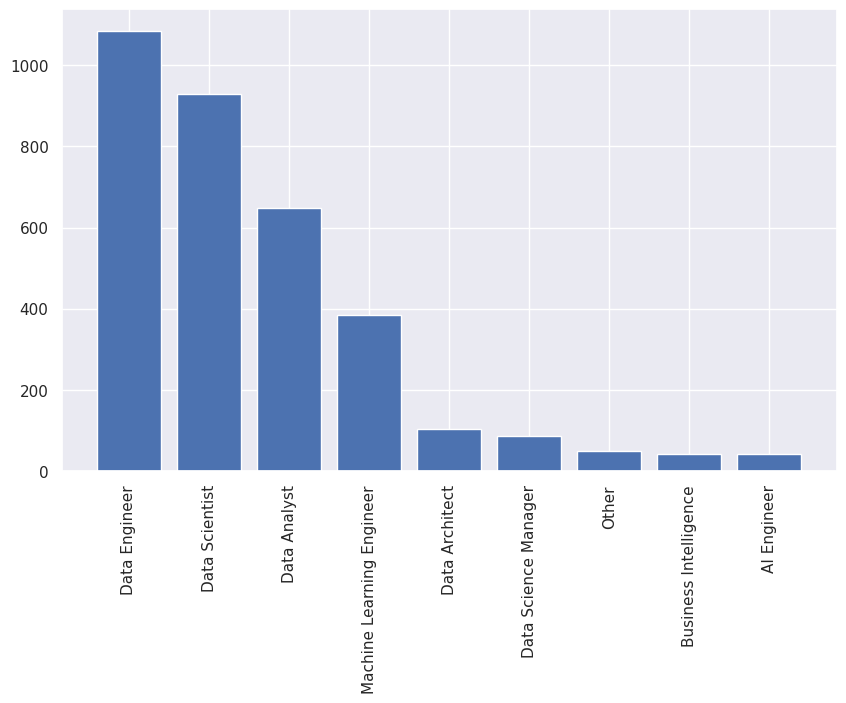

In [150]:
segment_job_top=df['segment_job_title'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(segment_job_top.index,segment_job_top.values)
plt.xticks(rotation=90)
plt.show()

In [151]:
def segment_residence(country):
    # Dictionary negara berdasarkan wilayah
    country_keywords = {
        'North America': ['US', 'CA', 'MX', 'PR', 'AS'],
        'South America': ['BR', 'AR', 'CO', 'CL', 'BO', 'DO', 'HN'],
        'Europe': ['ES', 'DE', 'GB', 'FR', 'NL', 'CH', 'PT', 'AT', 'FI', 'UA', 'IE', 'IT', 'BE', 'CZ', 'DK', 'GR', 'SE', 'SI', 'PL', 'LV', 'RO', 'LT', 'SK', 'CY', 'HR', 'BA', 'HU', 'RS', 'MK', 'LU', 'MT', 'JE'],
        'Africa': ['NG', 'GH', 'EG', 'MA', 'KE', 'DZ', 'TN'],
        'Asia': ['IN', 'HK', 'SG', 'TH', 'VN', 'CN', 'JP', 'PH', 'AE', 'MY', 'IL', 'UZ', 'IR', 'IQ', 'PK', 'ID'],
        'Oceania': ['AU', 'NZ'],
        'Other': ['CF', 'AM', 'KW', 'RU', 'TR', 'MD']
    }
    country=country.upper()

    for key,value in country_keywords.items():
      if any(countries in country for countries in value):
        return key

In [152]:
df['segment_residence']=df['employee_residence'].apply(segment_residence)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,segment_job_title,segment_residence
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist,Europe
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning Engineer,North America
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning Engineer,North America
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist,North America
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist,North America


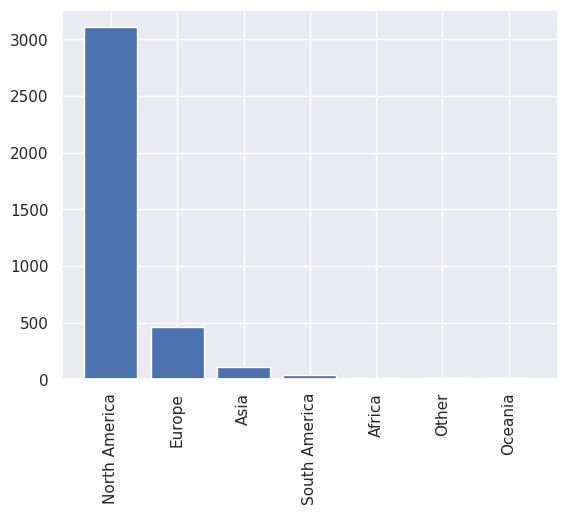

In [153]:
sr=df['segment_residence'].value_counts()
plt.bar(sr.index,sr.values)
plt.xticks(rotation=90)
plt.show()

In [154]:
def segment_location(country):
    country_keywords = {
        'North America': ['US', 'CA', 'MX', 'CR', 'PR', 'BS'],
        'South America': ['BR', 'CO', 'AR', 'CL', 'BO'],
        'Europe': ['ES', 'DE', 'GB', 'FR', 'NL', 'CH', 'FI', 'UA', 'IE', 'SE', 'SI', 'PT', 'RU', 'HR', 'EE', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'PL', 'AL', 'LT', 'HU', 'AT', 'SK', 'CZ', 'DK', 'LU', 'MD', 'MT', 'BE'],
        'Asia': ['IN', 'HK', 'SG', 'TH', 'VN', 'PK', 'IR', 'ID', 'AE', 'MY', 'JP', 'IQ', 'CN'],
        'Africa': ['NG', 'GH', 'KE', 'MA', 'EG', 'DZ'],
        'Oceania': ['AU', 'NZ', 'AS'],
        'Other': ['CF']
    }
    country=country.upper()

    for key,value in country_keywords.items():
      if any(countries in country for countries in value):
        return key

In [155]:
df['segment_location']=df['company_location'].apply(segment_location)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,segment_job_title,segment_residence,segment_location
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist,Europe,Europe
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning Engineer,North America,North America
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning Engineer,North America,North America
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist,North America,North America
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist,North America,North America


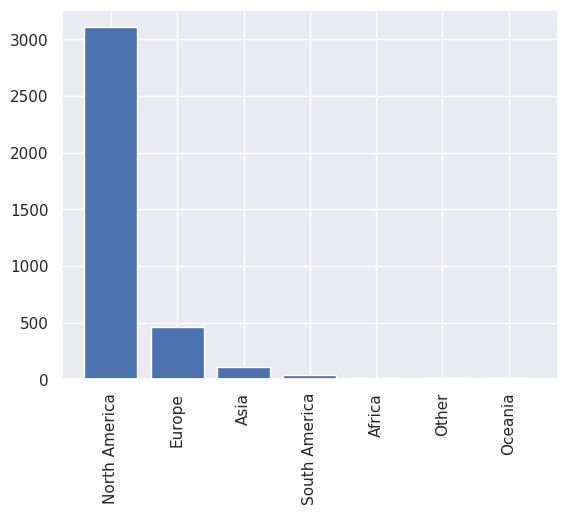

In [156]:
cl=df['segment_residence'].value_counts()
plt.bar(cl.index,cl.values)
plt.xticks(rotation=90)
plt.show()

In [157]:
df.select_dtypes(include='object').nunique()

,0
experience_level,4
employment_type,4
job_title,93
salary_currency,20
employee_residence,78
company_location,72
company_size,3
segment_job_title,9
segment_residence,7
segment_location,7


# EDA

<ipython-input-158-391303439788>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-158-391303439788>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-158-391303439788>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-158-391303439788>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-158-391303439788>:10: UserWarning: set_ticklabels() should only be used w

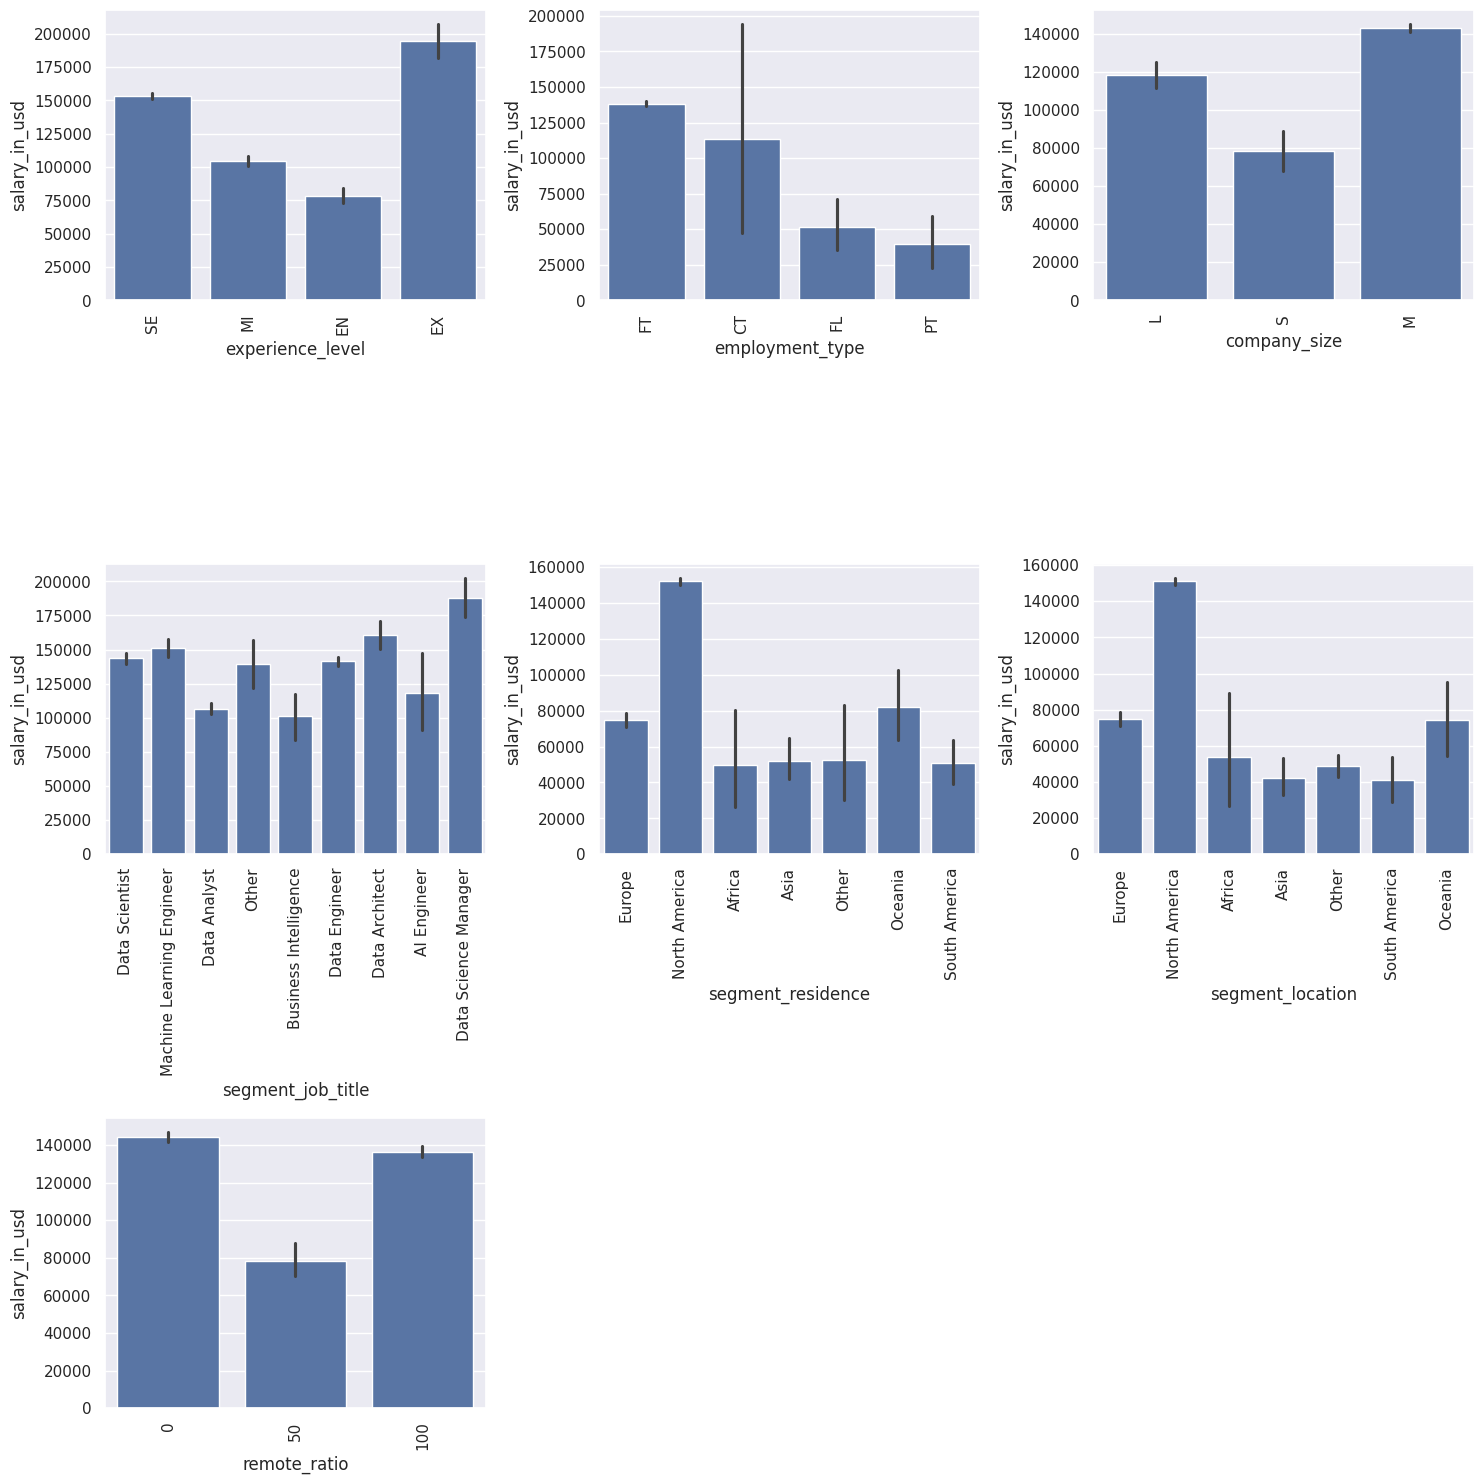

In [158]:
cat_vars=['experience_level','employment_type','company_size','segment_job_title','segment_residence','segment_location','remote_ratio']

num_cols=len(cat_vars)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  sns.barplot(x=var,y='salary_in_usd',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

<ipython-input-159-39ed745500d8>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels(),rotation=90)


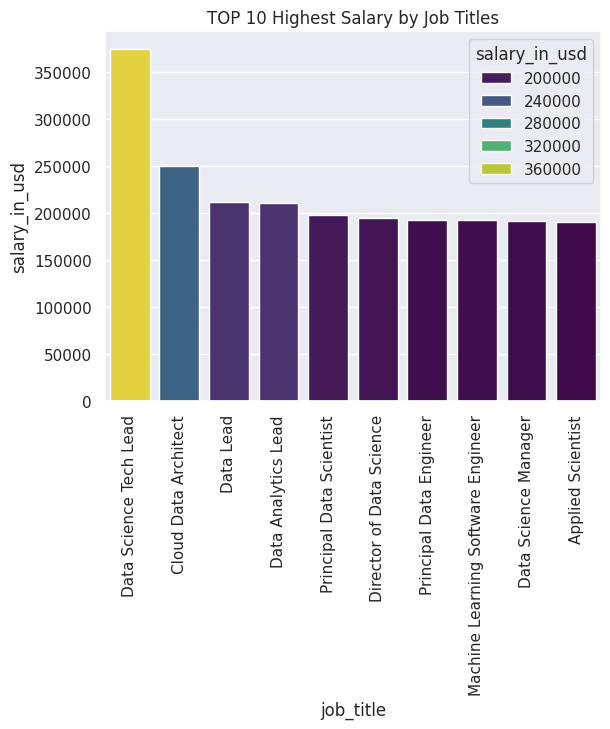

In [159]:
dfjob=df.groupby(df['job_title'])['salary_in_usd'].mean().reset_index()
dfjob1=dfjob.nlargest(10,'salary_in_usd')

axs=sns.barplot(x='job_title',y='salary_in_usd',data=dfjob1,palette='viridis',hue='salary_in_usd')
# plt.xticks(rotation=90)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.title('TOP 10 Highest Salary by Job Titles')
plt.show()

<ipython-input-160-868c3674a5da>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels(),rotation=90)


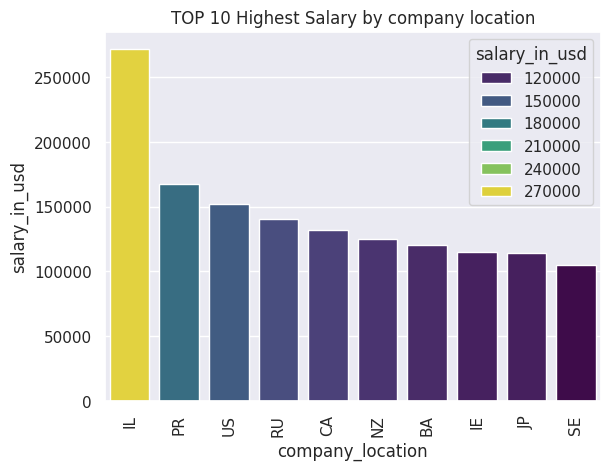

In [160]:
dfcon=df.groupby(df['company_location'])['salary_in_usd'].mean().reset_index()
dfcon2=dfcon.nlargest(10,'salary_in_usd')

axs=sns.barplot(x='company_location',y='salary_in_usd',data=dfcon2,palette='viridis',hue='salary_in_usd')
# plt.xticks(rotation=90)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.title('TOP 10 Highest Salary by company location')
plt.show()

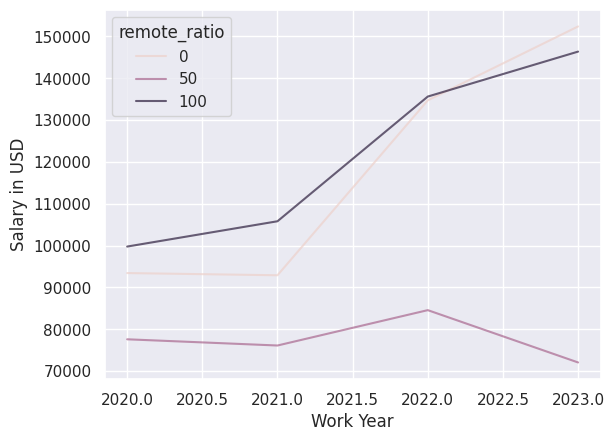

In [161]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='work_year',y='salary_in_usd',hue='remote_ratio',data=df,errorbar=(None),estimator='mean',alpha=0.7)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

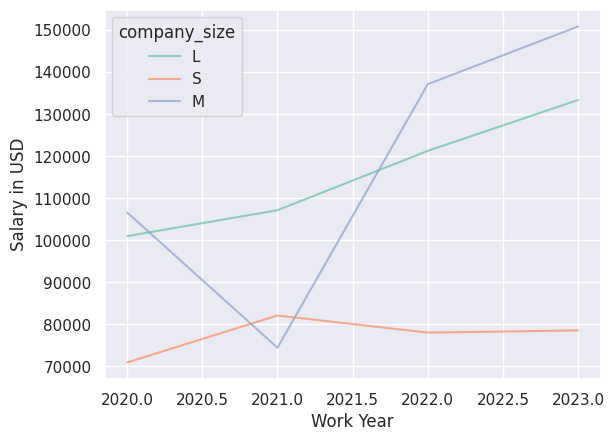

In [162]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='work_year',y='salary_in_usd',hue='company_size',data=df,errorbar=(None),estimator='mean',alpha=0.7)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

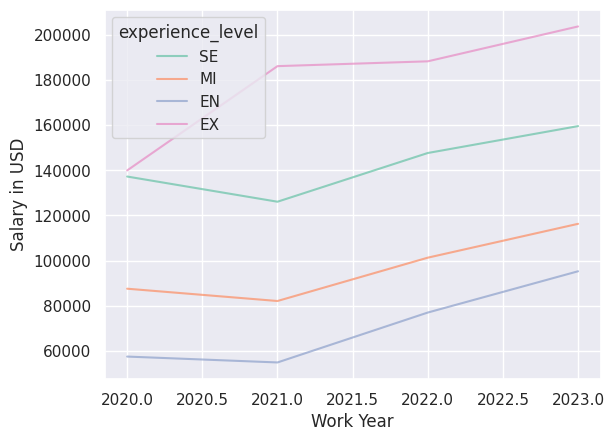

In [163]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='work_year',y='salary_in_usd',hue='experience_level',data=df,errorbar=(None),estimator='mean',alpha=0.7)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

# Data Preprocessing Part 2

In [164]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [165]:
# remove these columns because we have already use them in EDA
df=df.drop(columns=['job_title','employee_residence','company_location'],axis=1)
df.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_size,segment_job_title,segment_residence,segment_location
0,2023,SE,FT,80000,EUR,85847,100,L,Data Scientist,Europe,Europe
1,2023,MI,CT,30000,USD,30000,100,S,Machine Learning Engineer,North America,North America
2,2023,MI,CT,25500,USD,25500,100,S,Machine Learning Engineer,North America,North America
3,2023,SE,FT,175000,USD,175000,100,M,Data Scientist,North America,North America
4,2023,SE,FT,120000,USD,120000,100,M,Data Scientist,North America,North America


In [166]:
# remove these columns because we have already have salary_in_usd
df=df.drop(columns=['salary','salary_currency'],axis=1)
df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,segment_job_title,segment_residence,segment_location
0,2023,SE,FT,85847,100,L,Data Scientist,Europe,Europe
1,2023,MI,CT,30000,100,S,Machine Learning Engineer,North America,North America
2,2023,MI,CT,25500,100,S,Machine Learning Engineer,North America,North America
3,2023,SE,FT,175000,100,M,Data Scientist,North America,North America
4,2023,SE,FT,120000,100,M,Data Scientist,North America,North America


In [167]:
df=df.dropna()
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
salary_in_usd,0
remote_ratio,0
company_size,0
segment_job_title,0
segment_residence,0
segment_location,0


In [168]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for i in df.select_dtypes(include='object').columns:
  df[i]=encoder.fit_transform(df[i])

<Axes: >

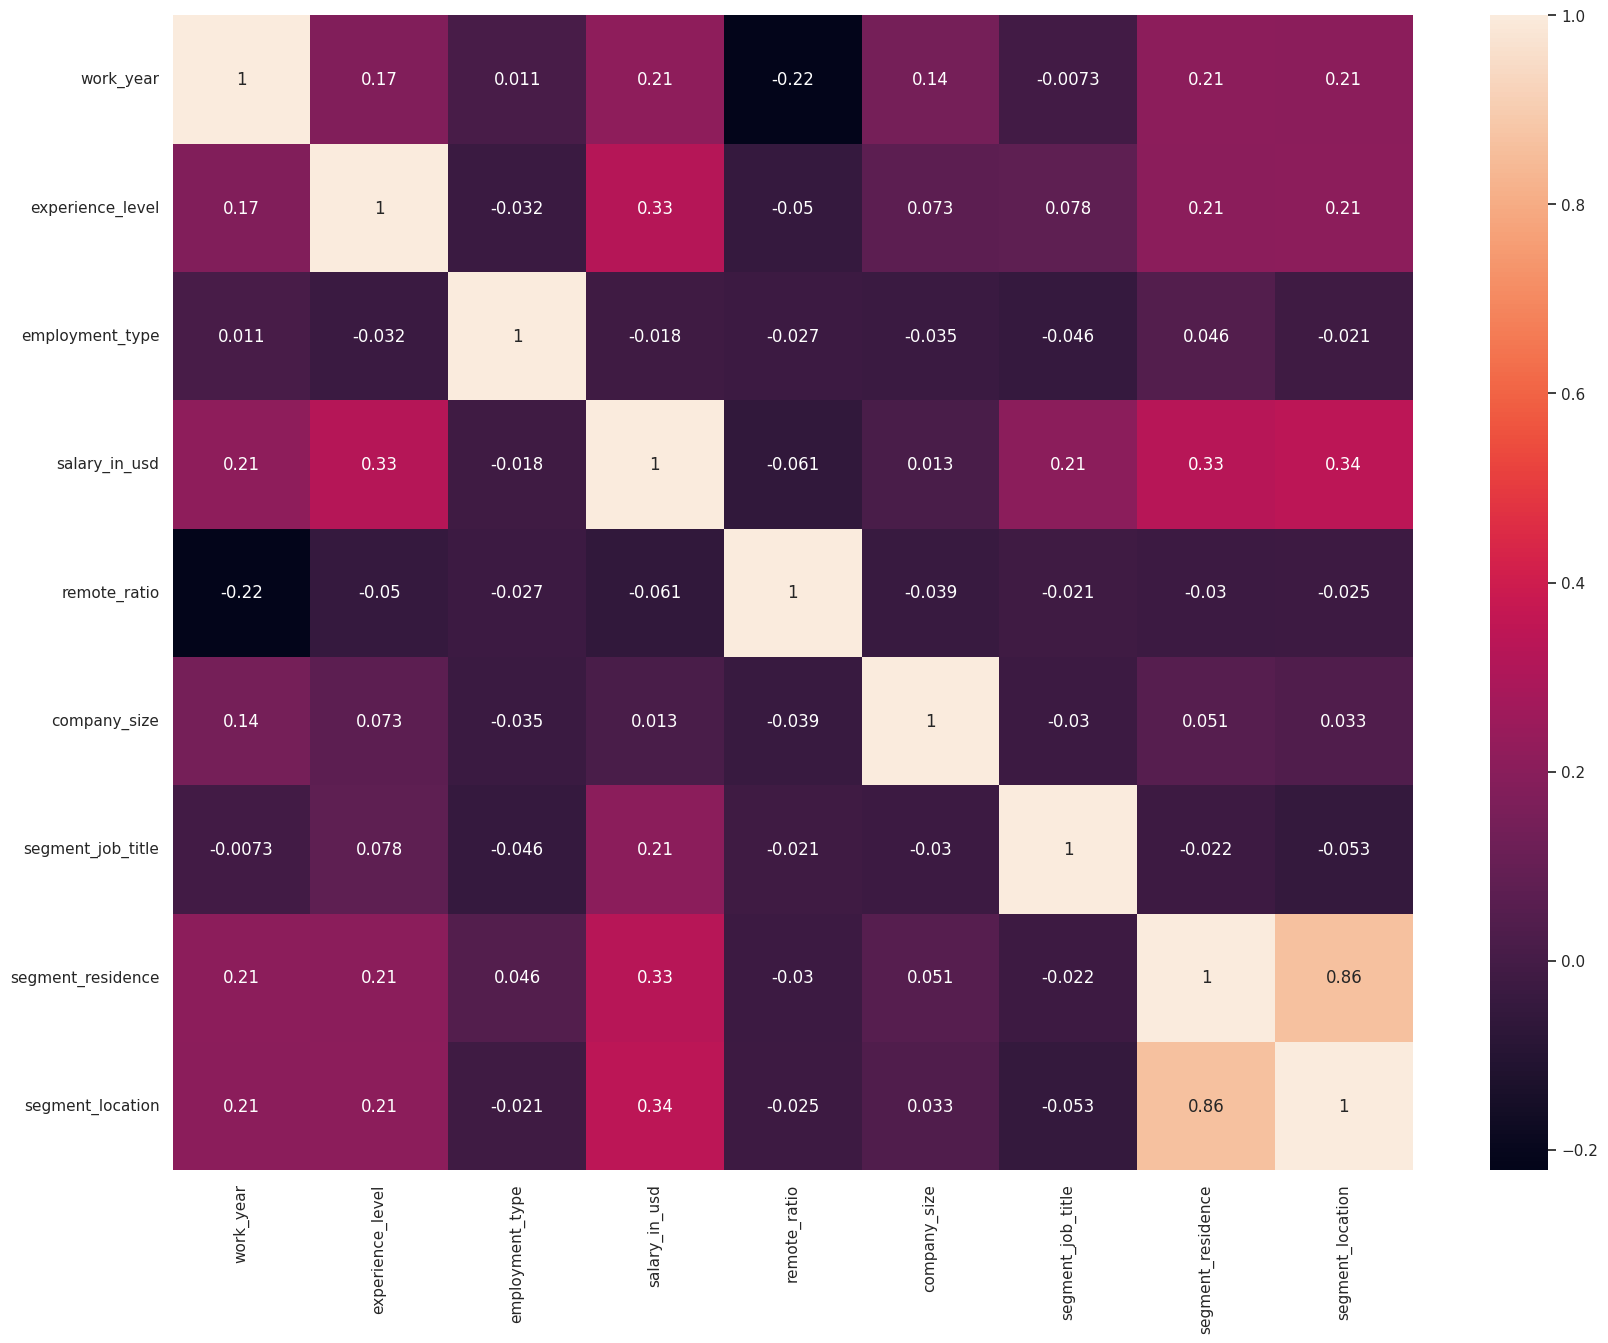

In [169]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [170]:
# remove outlier using z score
from scipy import stats

zscore=np.abs(stats.zscore(df['salary_in_usd']))
index=np.where(zscore > 3)

df=df.drop(df.index[index])
df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,segment_job_title,segment_residence,segment_location
0,2023,3,2,85847,100,0,6,2,2
1,2023,2,0,30000,100,2,7,3,3
2,2023,2,0,25500,100,2,7,3,3
3,2023,3,2,175000,100,1,6,3,3
4,2023,3,2,120000,100,1,6,3,3


In [171]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
num_features=df.select_dtypes(include=['int','float']).columns
df[num_features]=scaler.fit_transform(df[num_features])

# Model Building

In [172]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='salary_in_usd',axis=1)
y=df['salary_in_usd']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [174]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=6,min_samples_leaf=3,min_samples_split=8,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=8,
                      random_state=42)

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=rf.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 0.5745518892801325
MAE: 0.5828774744535347
r2: 0.42042270077238963


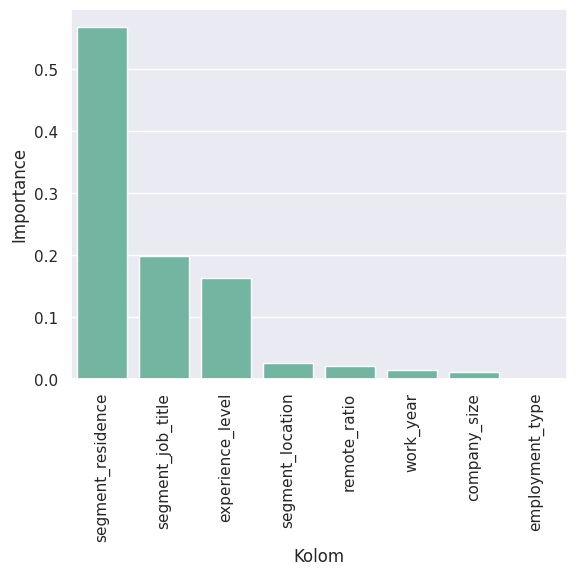

In [179]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
top_imp=imp_df.nlargest(10,'Importance')
sns.barplot(x='Kolom',y='Importance',data=top_imp)
plt.xticks(rotation=90)
plt.show()

In [188]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grid=({
    'learning_rate':[0.1,0.001,1],
    'n_estimators':[100,50,200],
    'max_depth':[2,3,5],
})
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [192]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=100)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [193]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=xgb.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 0.5686195369409326
MAE: 0.5627384039542406
r2: 0.4404477465161427


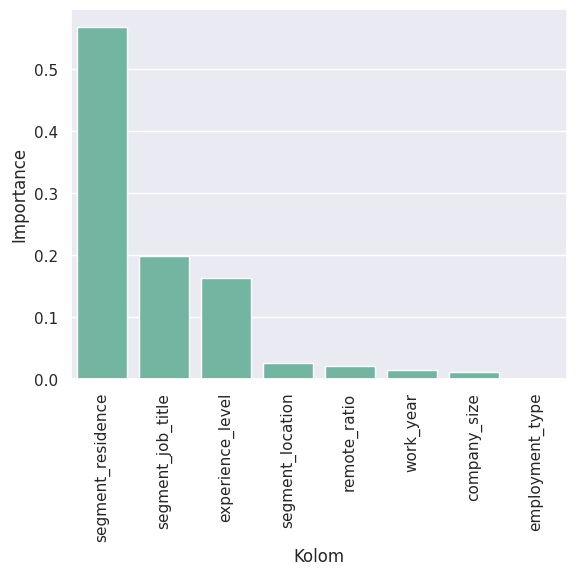

In [186]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
imp1=imp_df.sort_values(by='Importance',ascending=False)
imp2=imp1.head(10)
sns.barplot(x='Kolom',y='Importance',data=imp2)
plt.xticks(rotation=90)
plt.show()